### Project 4
#### Start with the mushroom data in the pandas DataFrame that you constructed in Week 13
- Use scikit-learn to determine which of the two predictor columns that you selected (odor and one other column of your choice) most accurately predicts whether or not a mushroom is poisonous. 
- Use scikit-learn’s predictive classifiers, you’ll want to convert each of your two (numeric categorical) predictor columns into a set of columns. 
- Clearly state your conclusions along with any recommendations for further analysis

In [4]:
#Import modules
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression

In [5]:
#Read in data from the Mushrooms Dataset, then convert to numerical values
import pandas as pd
mushrooms = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data', usecols = [0,2,5], names = ["Edibility", "CapSurface", "Odor"])
mushrooms["Edibility"].replace(['p','e'], ([0,1]), inplace=True)
mushrooms["CapSurface"].replace(['f','g','y','s'], ([0,1,2,3]), inplace=True)
mushrooms["Odor"].replace(['a','l','c','y','f','m','n','p','s'], ([0,1,2,3,4,5,6,7,8]), inplace=True)
mushrooms.head()

,Edibility,CapSurface,Odor
0,0,3,7
1,1,3,0
2,1,3,1
3,0,2,7
4,1,3,6


In [6]:
#convert columns to binary data
odorbin = pd.get_dummies(mushrooms['Odor'])
capsurfbin = pd.get_dummies(mushrooms['CapSurface'])
print('Odor head','\n', odorbin.head())
print('Cap Surface head','\n', capsurfbin.head())

Odor head 
    0  1  2  3  4  5  6  7  8
0  0  0  0  0  0  0  0  1  0
1  1  0  0  0  0  0  0  0  0
2  0  1  0  0  0  0  0  0  0
3  0  0  0  0  0  0  0  1  0
4  0  0  0  0  0  0  1  0  0
Cap Surface head 
    0  1  2  3
0  0  0  0  1
1  0  0  0  1
2  0  0  0  1
3  0  0  1  0
4  0  0  0  1


In [8]:
#concantenate the new columns to the orignial dataset
newset = pd.concat([mushrooms, odorbin, capsurfbin], axis = 1)

In [13]:
#set up x and y and test sets
X = newset.values[:, np.newaxis, 2]
X_train = X[:10]
X_test = X[-10:]
y_train = newset.Edibility[:10]
y_test = newset.Edibility[-10:]

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
pred = regr.predict(X_test)

In [14]:
#Calculate coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, pred))


Coefficients: 
 [-0.12190287]
Mean squared error: 0.38
Variance score: -0.51


### Show plot data for the Odor column
### The linear plot line shows that Odor does have a definitive relationship with Edibility, and therefore can be used to accurately predict edibility. 

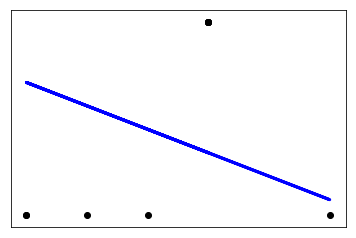

In [15]:
#show plotted data for Odor column

plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()


### Cap surface is not linear and therfore is not a good predictor of edibility.

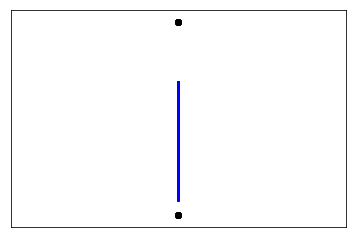

In [16]:
#Plot data for Cap Surface
X = newset.values[:, np.newaxis, 3]
X_train = X[:10]
X_test = X[-10:]
y_train = newset.Edibility[:10]
y_test = newset.Edibility[-10:]
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())
plt.show()

### Conclusion
In conclusion, odor is a good indicator of edbility, while cap surface is not. Further analysis might include analyses on a combination of attributes together, rather than evaluating single attributes separately.